## Bibliotecas Utilizadas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from datetime import datetime, time

Using TensorFlow backend.


In [2]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-17 11:18:26


# Carregando os dados 

In [3]:
path_treino = './fruits-15/Training' 
path_teste = './fruits-15/Test'

In [4]:
def get_dados(path):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = img_to_array(load_img(arquivo, target_size=(100, 100)))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [5]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [6]:
X_frutas, Y_frutas = get_dados(path_treino)

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
5 - Kiwi
6 - Lemon
7 - Mango
8 - Maracuja
9 - Orange
10 - Papaya
11 - Pear
12 - Pineapple
13 - Raspberry
14 - Strawberry


In [7]:
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)

In [8]:
X_train.shape

(8039, 100, 100, 3)

In [9]:
Y_train.shape

(8039,)

In [10]:
X_train = X_train.astype('float32')/255

In [11]:
num_frutas = len(list(set(Y_train)))
print(num_frutas)
Y_train = to_categorical(Y_train, num_frutas)

15


In [12]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(4, (5, 5), input_shape=(100, 100, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)

model.add(Conv2D(16, (5, 5), input_shape=(100, 100, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)

model.add(Conv2D(32, (5, 5), input_shape=(100, 100, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)

model.add(Conv2D(64, (5, 5), input_shape=(100, 100, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print(model.output_shape)
model.add(Dense(1024, activation='sigmoid'))
print(model.output_shape)
model.add(Dense(256, activation='sigmoid'))
print(model.output_shape)
model.add(Dense(60, activation='sigmoid'))
print(model.output_shape)
#Função de Ativação Softmax
model.add(Dense(num_frutas, activation='softmax'))
print(model.output_shape)

(None, 96, 96, 4)
(None, 48, 48, 4)
(None, 44, 44, 16)
(None, 22, 22, 16)
(None, 18, 18, 32)
(None, 9, 9, 32)
(None, 5, 5, 64)
(None, 2, 2, 64)
(None, 256)
(None, 1024)
(None, 256)
(None, 60)
(None, 15)


In [13]:
#plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=10, batch_size=25)

Train on 6431 samples, validate on 1608 samples
Epoch 1/10
6431/6431 [==============================] - 38s 6ms/step - loss: 1.3863 - accuracy: 0.5867 - val_loss: 6.4695 - val_accuracy: 0.0249
Epoch 2/10
6431/6431 [==============================] - 10s 2ms/step - loss: 0.2859 - accuracy: 0.9484 - val_loss: 7.5478 - val_accuracy: 0.0473
Epoch 3/10
6431/6431 [==============================] - 9s 1ms/step - loss: 0.0904 - accuracy: 0.9841 - val_loss: 8.0160 - val_accuracy: 0.0740
Epoch 4/10
6431/6431 [==============================] - 10s 1ms/step - loss: 0.0796 - accuracy: 0.9821 - val_loss: 8.3261 - val_accuracy: 0.0591
Epoch 5/10
6431/6431 [==============================] - 10s 1ms/step - loss: 0.0237 - accuracy: 0.9978 - val_loss: 8.6884 - val_accuracy: 0.0777
Epoch 6/10
6431/6431 [==============================] - 10s 1ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 8.8930 - val_accuracy: 0.0752
Epoch 7/10
6431/6431 [==============================] - 10s 2ms/step - loss: 0.0073

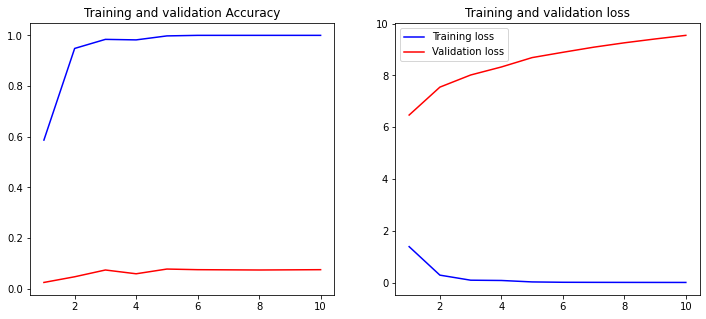

In [16]:
plot_history(history)

In [17]:
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 18.50%
Acurária da CNN: 81.50%


In [18]:
X_frutas, Y_frutas = get_dados(path_teste)

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
5 - Kiwi
6 - Lemon
7 - Mango
8 - Maracuja
9 - Orange
10 - Papaya
11 - Pear
12 - Pineapple
13 - Raspberry
14 - Strawberry


In [19]:
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)

In [20]:
X_test = X_test.astype('float32')/255
Y_test = to_categorical(Y_test, num_frutas)

In [21]:
X_test.shape

(2694, 100, 100, 3)

In [22]:
Y_test.shape

(2694, 15)

In [23]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 19.52%
Acurária da CNN: 80.48%


In [24]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Fim Execução : 
2021-07-17 11:22:23
